/tmp/ipykernel_58272/1186232407.py:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(212)


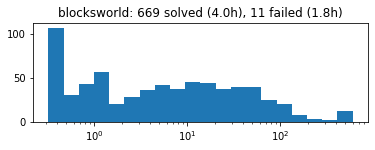

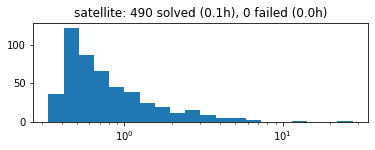

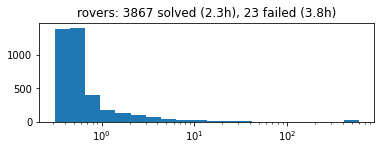

In [1]:

import os 
import json
import matplotlib.pyplot as plt
import numpy as np


for domain in os.listdir("data"): 
    dir = f"data/{domain}/good-operators-unit"

    times = []
    solved_times = []
    for p in os.listdir(dir): 
        with open(f"{dir}/{p}/properties") as f: 
            data =json.load(f)
            if data['coverage'] == 1: 
                solved_times.append(data['planner_wall_clock_time'])
            times.append(data['planner_wall_clock_time'])

    time_solved = sum(solved_times)/3600
    num_solved = len(solved_times)
    num_unsolved = len(times)-len(solved_times)
    time_unsolved = (sum(times) - sum(solved_times))/3600
    hist, bins, _ = plt.hist(times, bins=20)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.subplot(212)
    plt.hist(times, bins=logbins)
    plt.xscale('log')
    plt.title(f"{domain}: {num_solved} solved ({time_solved:.1f}h), {num_unsolved} failed ({time_unsolved:.1f}h)")
    plt.show()
